In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [26]:
#Constants
a=1e-3
w=0.8
v=0.024
K=10
rho=0.005
tau=30
beta=100
gamma=10
modFrequency=0.0039
m=0.25
sigma=12
t_start=0
t_end=1000000
transient=850000

In [27]:
#Initial state of system
initialState=[0.1,0,1,sigma]
initialState2=[0.08984257896679101,0.011125967802490916,7.271613685261609,8.448815179371296]

In [28]:
#ODE model for chemostat
def odeModel(t,y):
    B,I,P,S=y
    B_dot=v*B*(S/(S+K)) - B*(rho+a*w*P)
    I_dot=a*w*B*P - I*(rho + 1/tau)
    P_dot=1e-6-P*(rho + a*(B+I)) + beta*(I/tau)
    S_dot=rho*(resourceFlow(t)-S) - gamma*v*B*(S/(S+K))

    return [B_dot,I_dot,P_dot,S_dot]

#returns resource flow to chemostat
def resourceFlow(t):
    return sigma*(1-(m/2)*(1+np.sin(modFrequency*t)))

solution = solve_ivp(odeModel,
                     [t_start,t_end],
                     initialState,method='RK45',
                     t_eval=np.linspace(t_start, t_end, 100000))
solution2 = solve_ivp(odeModel,
                     [t_start,t_end],
                     initialState2,method='RK45',
                     t_eval=np.linspace(t_start, t_end, 100000))

In [29]:
temp=solution.t >= transient

B_sol=solution.y[0]
I_sol=solution.y[1]
P_sol=solution.y[2]
S_sol=solution.y[3]
B_sol2=solution2.y[0]
I_sol2=solution2.y[1]
P_sol2=solution2.y[2]
S_sol2=solution2.y[3]

BPlot=B_sol[temp]
IPlot=I_sol[temp]
PPlot=P_sol[temp]
SPlot=S_sol[temp]
BPlot2=B_sol2[temp]
IPlot2=I_sol2[temp]
PPlot2=P_sol2[temp]
SPlot2=S_sol2[temp]

In [30]:
B_steady = np.mean(BPlot)
I_steady = np.mean(IPlot)
P_steady = np.mean(PPlot)
S_steady = np.mean(SPlot)

print("--- CALCULATED CENTER POINTS ---")
print(f"B (Bacteria): {B_steady}")
print(f"I (Infected): {I_steady}")
print(f"P (Phage):    {P_steady}")
print(f"S (Resource): {S_steady}")

--- CALCULATED CENTER POINTS ---
B (Bacteria): 0.09022702668846647
I (Infected): 0.011513743088323236
P (Phage):    7.52307192867474
S (Resource): 8.715188795531336


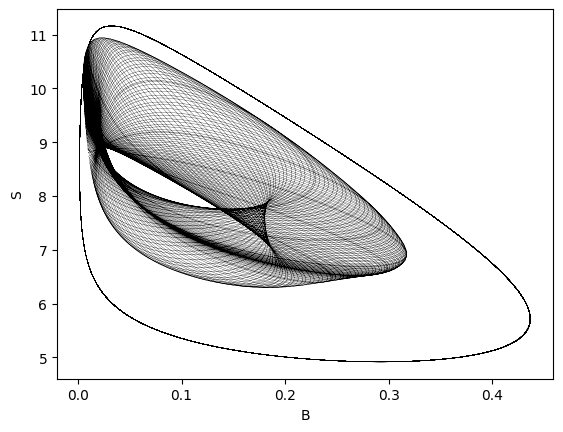

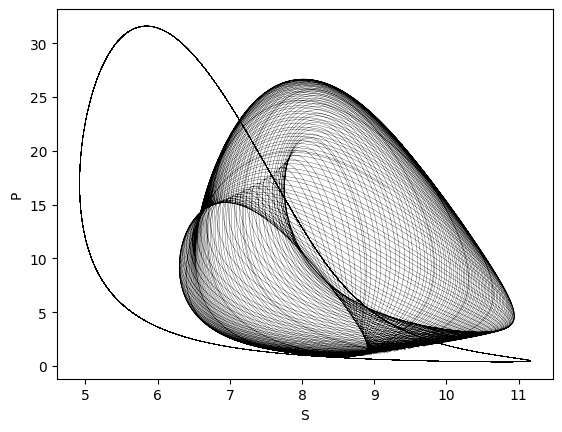

In [ ]:
plt.plot(BPlot,SPlot,color='black',linewidth=0.2)
plt.plot(BPlot2,SPlot2,color='black',linewidth=0.2)
plt.xlabel("B")
plt.ylabel("S")
plt.show()
plt.plot(SPlot,PPlot,color='black',linewidth=0.2)
plt.plot(SPlot2,PPlot2,color='black',linewidth=0.2)
plt.xlabel("S")
plt.ylabel("P")
plt.show()

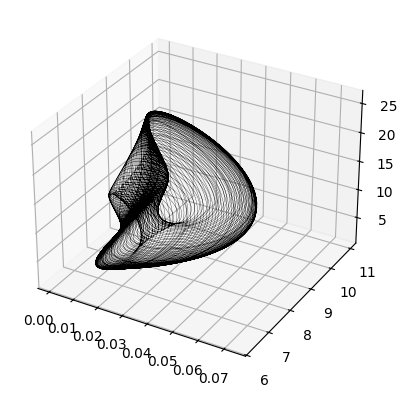

In [32]:
ax = plt.axes(projection='3d')
ax.plot3D(IPlot2,SPlot2,PPlot2,color='black',linewidth=0.2)
ax.grid(True)
plt.show()